# CNN Model performance

In this notebook I am going to show the performance results of the CNN model trained on MFCCs- and RPCCs-transformed audio data on classifying speaker emotion from audio data. <br>
The complete code can be found in the 'analysis/40_predict' folder located in this repository.

## Importing required libraries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## 1. MFCCs model

### Read predictions on test data

In [166]:
path = '../analysis/40_predict/10_signal/output/predictions.csv'

predictions_mfcc = pd.read_csv(path)

y_true = predictions_mfcc.actualvalues
y_pred = predictions_mfcc.predictedvalues

accuracy = accuracy_score(y_true, y_pred) * 100
print('Accuracy score =', np.round(accuracy, 2))

f1 = f1_score(y_true, y_pred, average='macro') * 100
print('F1 score =', np.round(f1, 2))

Accuracy score = 59.38
F1 score = 59.34


### Confusion matrix

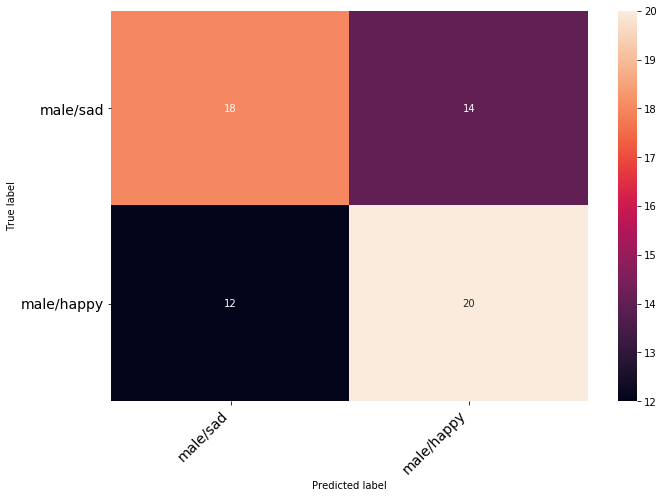

In [167]:
def plot_confusion_matrix(y_true, y_pred):

    c = confusion_matrix(y_true, y_pred)
    class_names = ['male/sad', 'male/happy']
    df_cm = pd.DataFrame(c, index=class_names, columns=class_names)

    fig = plt.figure(figsize=(10,7))

    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout(True)
    plt.show()
    
plot_confusion_matrix(y_true, y_pred)

# 2. RPCCs model

### Read predictions on test data

In [168]:
path = '../analysis/40_predict/20_rp/output/predictions.csv'

predictions_rpcc = pd.read_csv(path)

y_true = predictions_rpcc.actualvalues
y_pred = predictions_rpcc.predictedvalues

In [169]:
accuracy = accuracy_score(y_true, y_pred) * 100
print('Accuracy score =', np.round(accuracy, 2))

f1 = f1_score(y_true, y_pred, average='macro') * 100
print('F1 score =', np.round(f1, 2))

Accuracy score = 68.75
F1 score = 68.47


### Confusion matrix

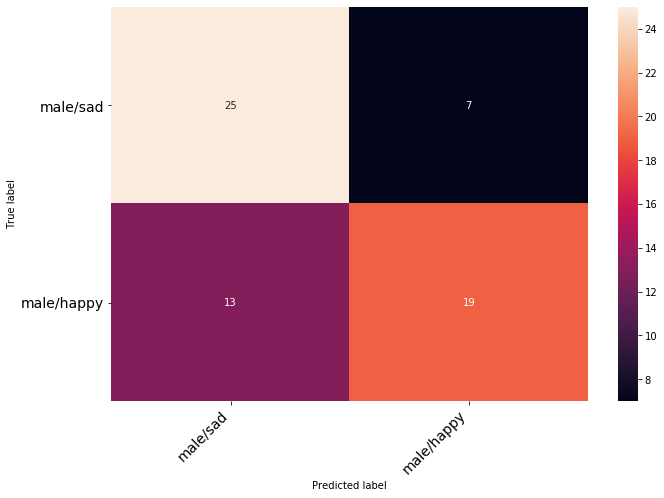

In [170]:
plot_confusion_matrix(y_true, y_pred)

# 3. Comparing model performances

We observe that the RPCCs model overall outperforms the MFCCs model. In particular, more male 'sad' speakers are predicted correctly by the RPCCs model <br>

We can count the speakers that are misclassified by the MFCCs model but classified correctly in the RPCCs model e vice versa. 

In [244]:
# actual positives/negatives
mfcc_pos = predictions_mfcc[predictions_mfcc.actualvalues=='male_positive']
mfcc_neg = predictions_mfcc[predictions_mfcc.actualvalues=='male_negative']

rpcc_pos = predictions_rpcc[predictions_rpcc.actualvalues=='male_positive']
rpcc_neg = predictions_rpcc[predictions_rpcc.actualvalues=='male_negative']

# true predicted positives/negative
mfcc_tp = [mfcc_pos.predictedvalues == 'male_positive'][0].values
mfcc_tn = [mfcc_neg.predictedvalues == 'male_negative'][0].values

rpcc_tp = [rpcc_pos.predictedvalues == 'male_positive'][0].values
rpcc_tn = [rpcc_neg.predictedvalues == 'male_negative'][0].values

# true positive DataFrame
df_tp = pd.DataFrame([mfcc_tp, rpcc_tp]).T
df_tp.columns = ['mfcc', 'rppc']

# true negative DataFrame
df_tn = pd.DataFrame([mfcc_tn, rpcc_tn]).T
df_tn.columns = ['mfcc', 'rppc']

In [250]:
print('N speakers = ', len(predictions_mfcc))
print('N happy = ', len(mfcc_pos))
print('N sad = ', len(mfcc_neg))

print()
print('Happy speakers')
# happy speakers misclassified by both models
print('N. misclassified both models =', len(df_tp[(df_tp.mfcc == False)&(df_tp.rppc == False)]))

# happy speakers misclassified by mfcc but classified correcly by rpcc
print('N. misclassified mfcc/classified corr. rpcc =', len(df_tp[(df_tp.mfcc == False)&(df_tp.rppc == True)]))

# happy speakers misclassified by rpcc but classified correcly by mfcc
print('N. misclassified rpcc/classified corr. mfcc =', len(df_tp[(df_tp.mfcc == True)&(df_tp.rppc == False)]))

print()
print('Sad speakers')
# sad speakers misclassified by both models
print('N. misclassified both models =', len(df_tn[(df_tn.mfcc == False)&(df_tn.rppc == False)]))

# sad speakers misclassified by mfcc but classified correcly by rpcc
print('N. misclassified mfcc/classified corr. rpcc =', len(df_tn[(df_tn.mfcc == False)&(df_tn.rppc == True)]))

# sad speakers misclassified by rpcc but classified correcly by mfcc
print('N. misclassified rpcc/classified corr. mfcc =', len(df_tn[(df_tn.mfcc == True)&(df_tn.rppc == False)]))

N speakers =  64
N happy =  32
N sad =  32

Happy speakers
N. misclassified both models = 10
N. misclassified mfcc/classified corr. rpcc = 2
N. misclassified rpcc/classified corr. mfcc = 3

Sad speakers
N. misclassified both models = 3
N. misclassified mfcc/classified corr. rpcc = 11
N. misclassified rpcc/classified corr. mfcc = 4
